# Prediction with Classification Dataset

This notebook analyzes the **Loan Approval** dataset. The goal is to explore the data, clean it, visualize key insights, and build predictive models if applicable.

# Imports important Libraries and read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data:
- Train the model with data to explore it.
- Test the model to verify its accuracy and prediction correctness.

In [2]:
df_train = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df_test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Overview

In [5]:
df_train.shape

(614, 13)

In [6]:
df_test.shape

(367, 12)

In [9]:
#detect datatype for each column and number of missing-rows in train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#detect datatype for each column and number of missing-rows in test datset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
# static info about numerical column in train dataset
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# static info about numerical column in test dataset
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# EDA

# Data Cleaning

In [14]:
df_train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [17]:
# detect the precentage of missing-values
missing_precent = (df_train.isnull().sum()/len(df_train))*100
missing_precent

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [18]:
df_test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [19]:
# to know if any row have the common missing value for more than column or not
null_credit_history = df_train[df_train['Credit_History'].isnull()]
null_credit_history

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [20]:
df_train.duplicated().sum()

0

In [21]:
df_test.duplicated().sum()

0

In [23]:
# number of unique values for each column
df_train.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


delete the column I don't need it

In [24]:
del df_train['Loan_ID']

In [25]:
df_train.duplicated().sum()

0

In [26]:
df_train['LoanAmount'].describe()

,LoanAmount
count,592.000000
mean,146.412162
std,85.587325
min,9.000000
25%,100.000000
50%,128.000000
75%,168.000000
max,700.000000


this plot to know if I have outlieres or not

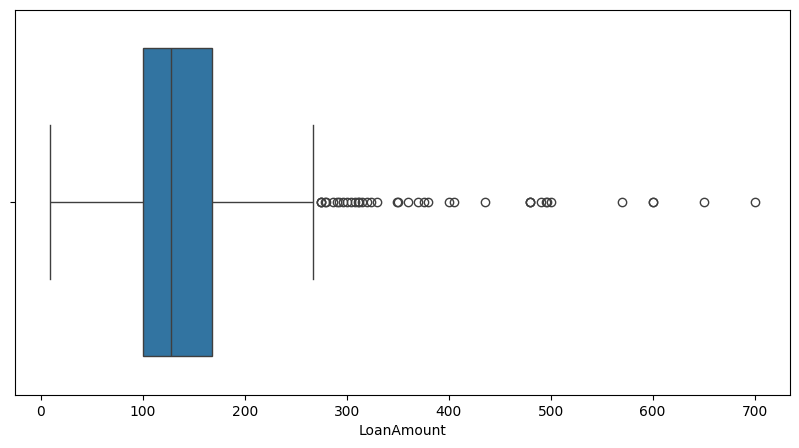

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanAmount', data=df_train)
plt.show()

In [28]:
print(df_train['Loan_Amount_Term'].describe())
print('---unique values in Loan_Amount_Term---')
df_train['Loan_Amount_Term'].unique()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64
---unique values in Loan_Amount_Term---


array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [29]:
df_train.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Nulls Information

---

- Gender	13
- Married	3
- Dependents	15
- Self_Employed	32
- LoanAmount 22
- Loan_Amount_Term	14
- Credit_History	50

In [30]:
# detect the common missing values for more than column
null_Married = df_train[df_train['Married'].isnull()]
null_Married

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


fill the missing rows

In [31]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)

In [32]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean() ,inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(),inplace=True)

In [33]:
df_train.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# Data Visualization

this plots to know the count for each column

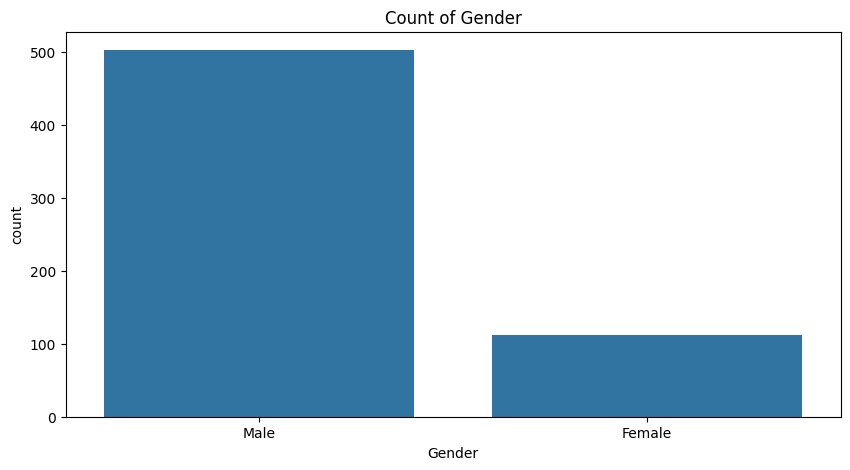

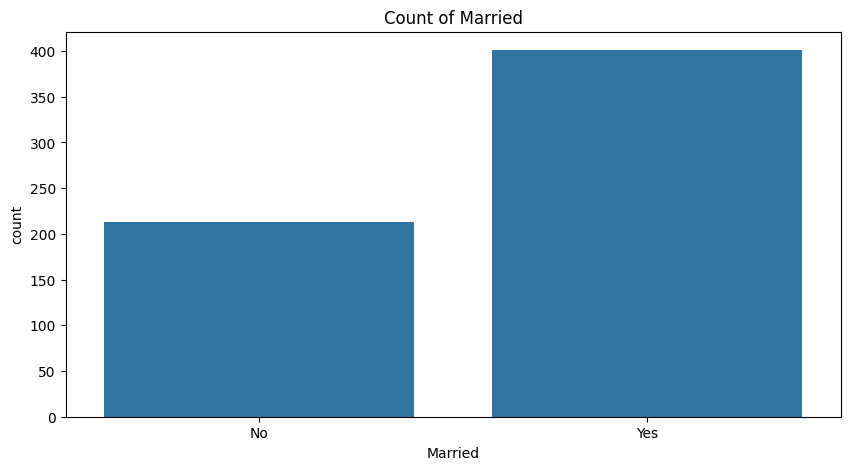

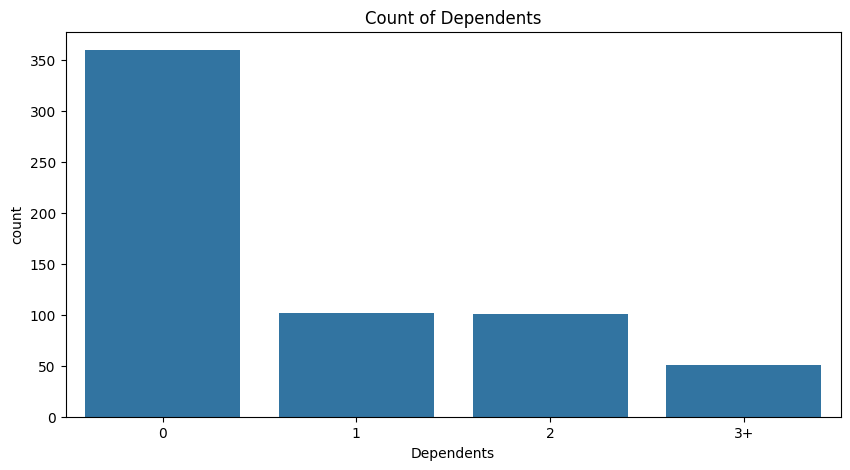

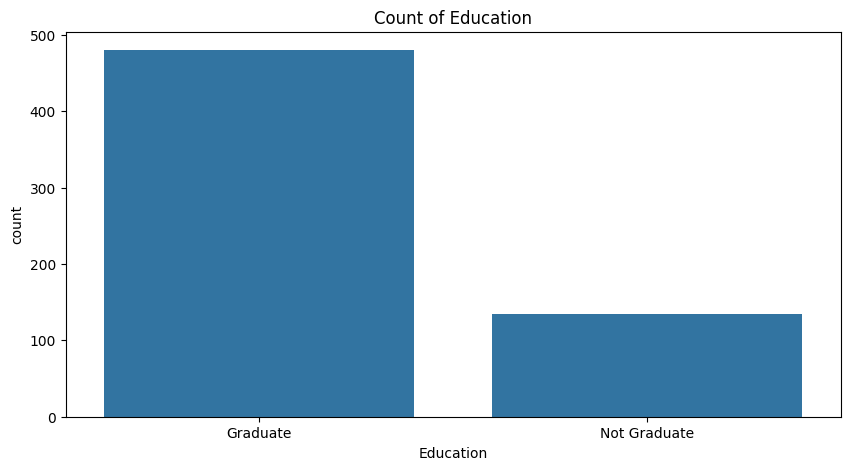

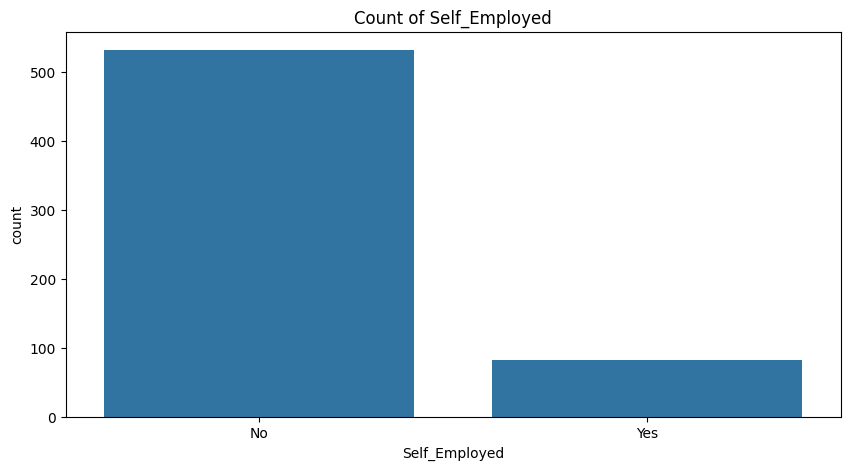

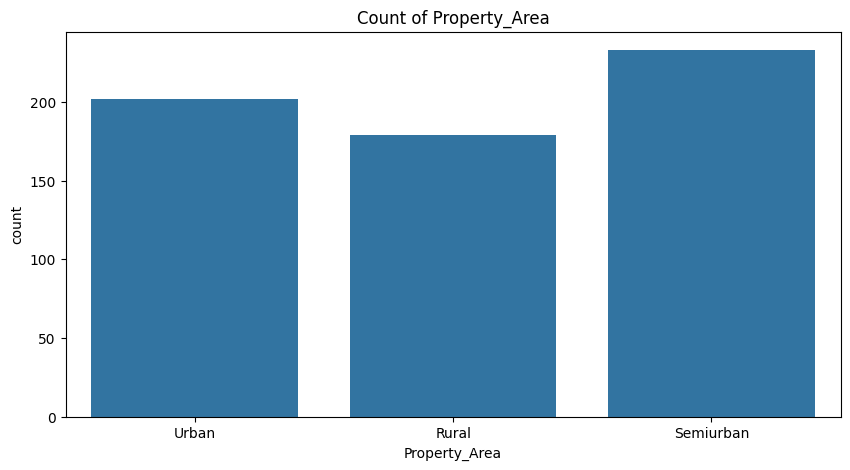

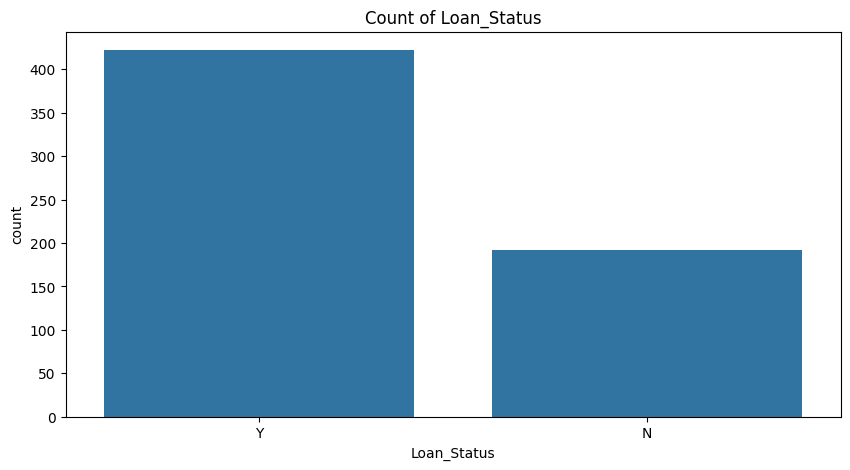

In [34]:
for col in df_train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df_train)
    plt.title(f'Count of {col}')
    plt.show()


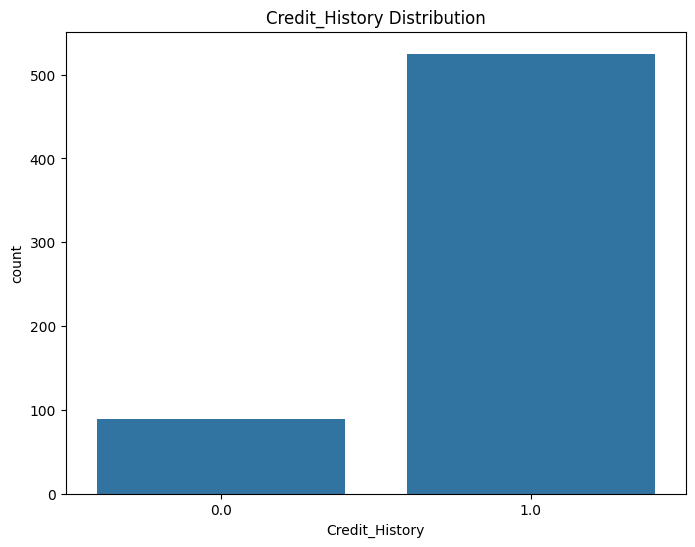

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='Credit_History', data=df_train)
plt.title('Credit_History Distribution')
plt.show()

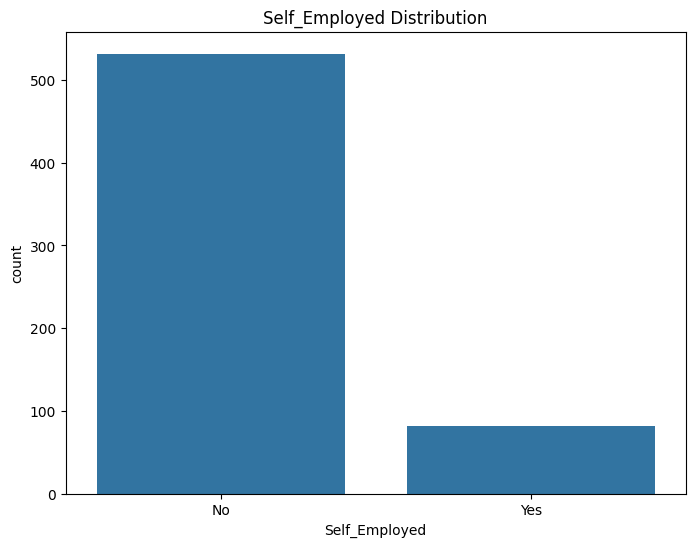

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='Self_Employed', data=df_train)
plt.title('Self_Employed Distribution')
plt.show()

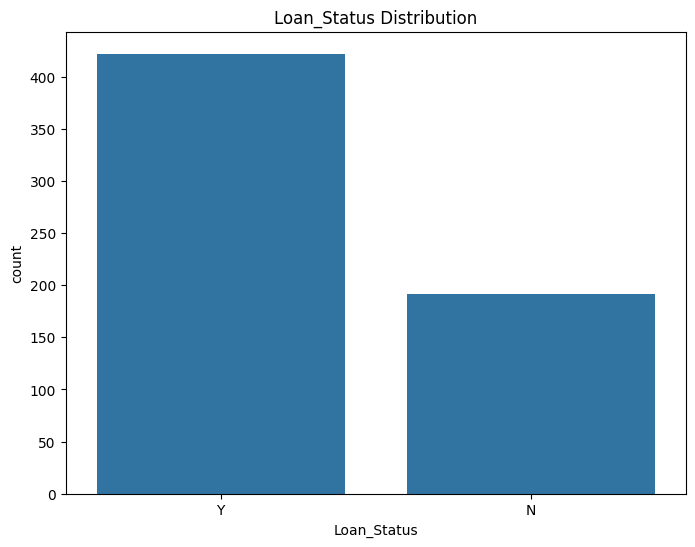

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Loan_Status Distribution')
plt.show()

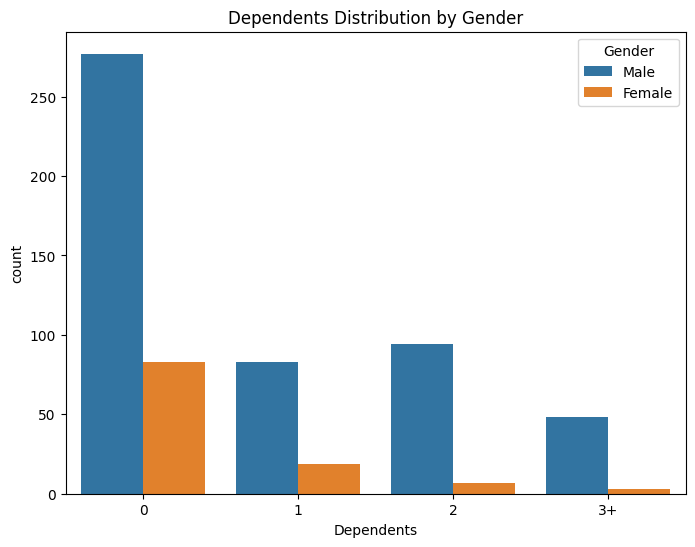

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Gender', data=df_train)
plt.title('Dependents Distribution by Gender')
plt.show()


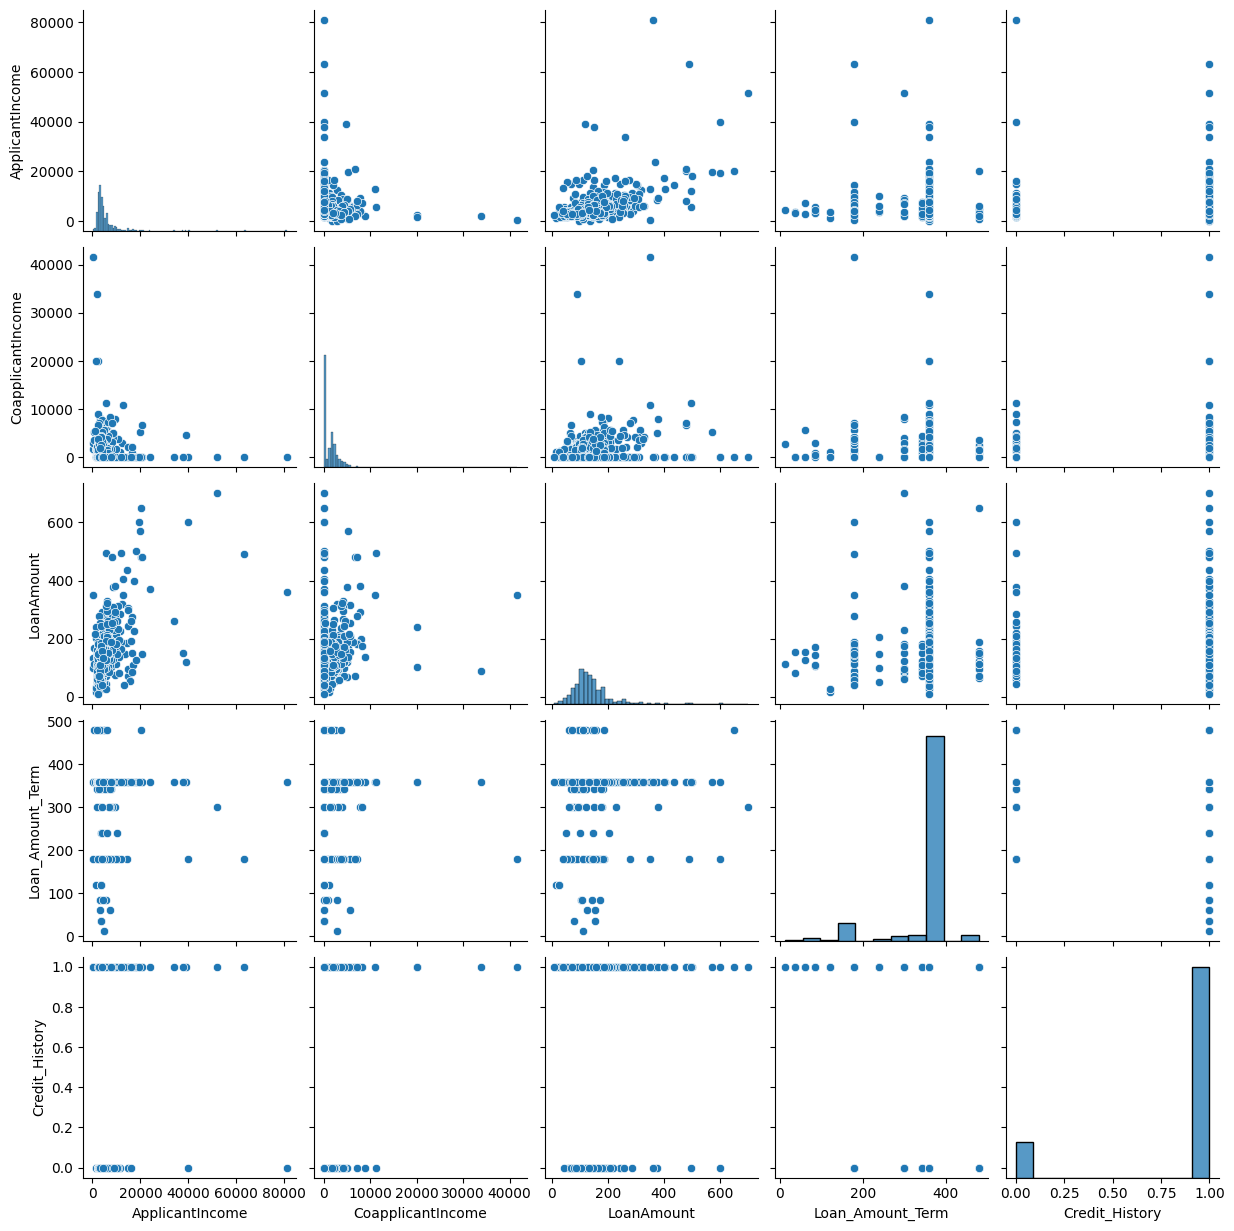

In [40]:
sns.pairplot(df_train)

In [41]:
df_train.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


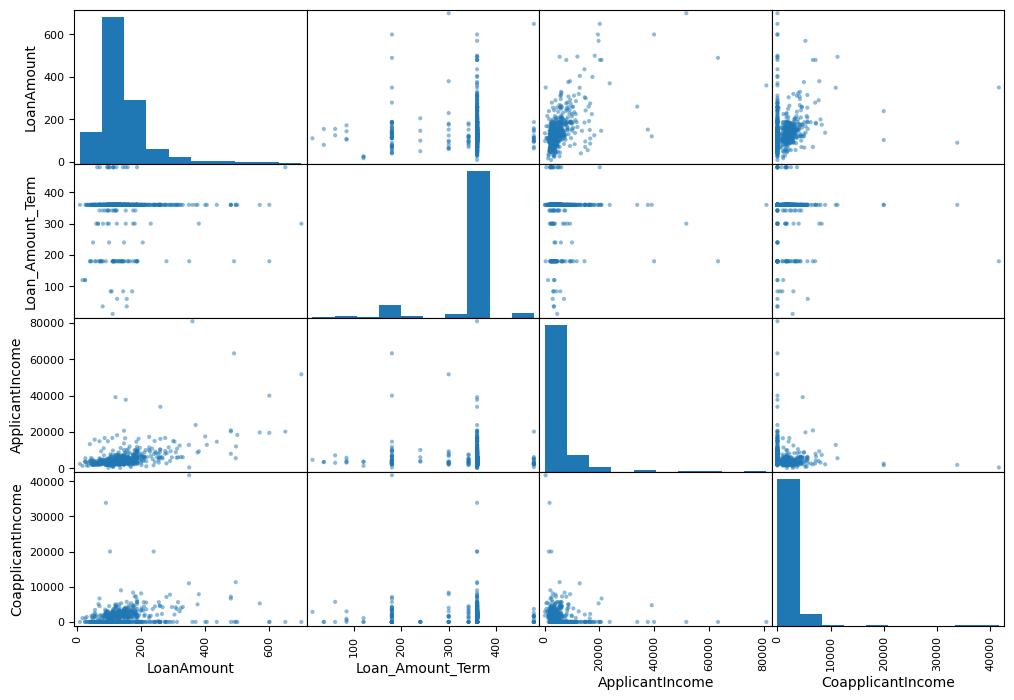

In [42]:
from pandas.plotting import scatter_matrix
num_col = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
scatter_matrix(df_train[num_col], figsize=(12, 8))
plt.show()

to know if any relation between any column and loan_status column

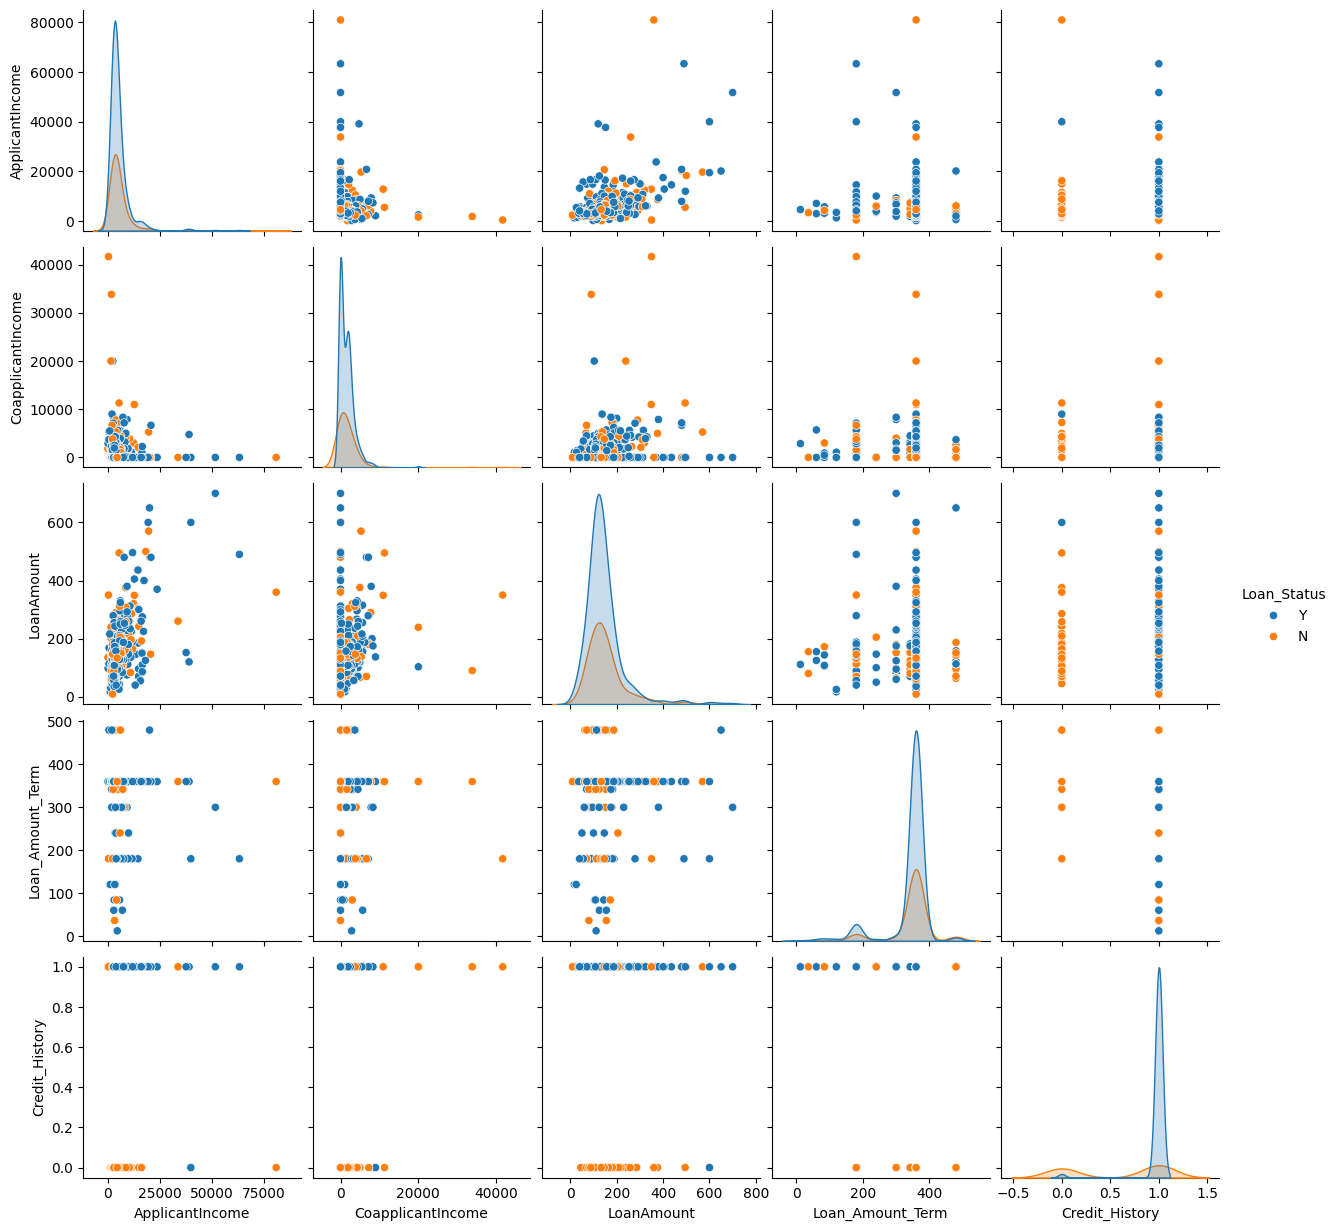

In [43]:
sns.pairplot(df_train, hue='Loan_Status')

In [44]:
print(df_train['Self_Employed'].unique())
print(df_train['Dependents'].unique())
print(df_train['Credit_History'].unique())
print(df_train['Property_Area'].unique())
print(df_train['Education'].unique())

['No' 'Yes']
['0' '1' '2' '3+']
[1. 0.]
['Urban' 'Rural' 'Semiurban']
['Graduate' 'Not Graduate']


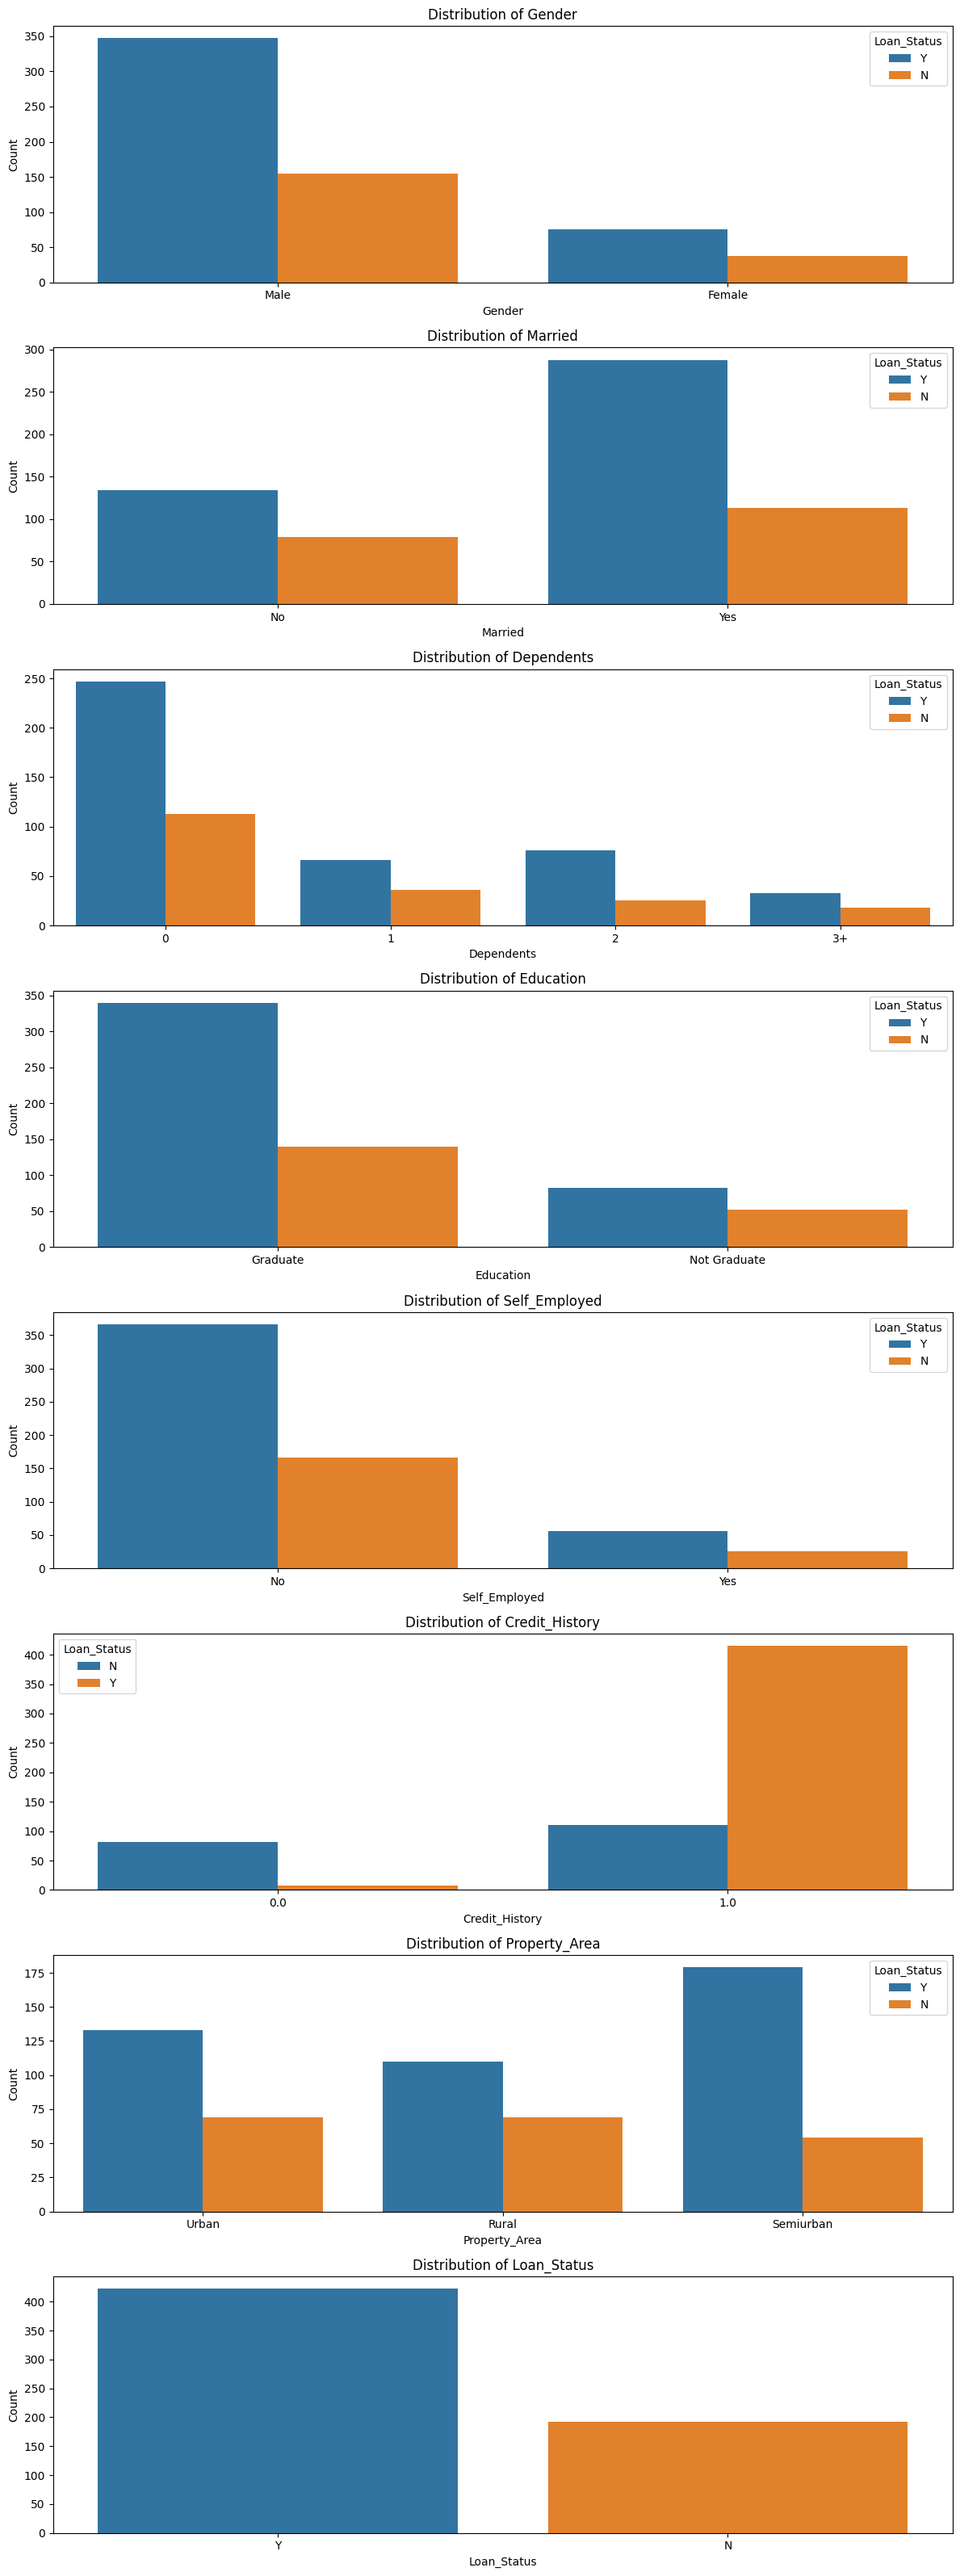

In [45]:
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

num_cat = len(cat_columns)
fig, axes = plt.subplots(nrows=num_cat, ncols=1, figsize=(12, 4*num_cat))

for i, column in enumerate(cat_columns):
    sns.countplot(x=column, data=df_train, ax=axes[i], hue='Loan_Status')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [46]:
Q1 = df_train['ApplicantIncome'].quantile(0.25)
Q3 = df_train['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_train[(df_train['ApplicantIncome'] < lower_bound) | (df_train['ApplicantIncome'] > upper_bound)]
print(outliers)

Q1_co = df_train['CoapplicantIncome'].quantile(0.25)
Q3_co = df_train['CoapplicantIncome'].quantile(0.75)
IQR_co = Q3_co - Q1_co

lower_bound_co = Q1_co - 1.5 * IQR_co
upper_bound_co = Q3_co + 1.5 * IQR_co

outliers_co = df_train[(df_train['CoapplicantIncome'] < lower_bound_co) | (df_train['CoapplicantIncome'] > upper_bound_co)]
print(outliers_co)

df_train = df_train[(df_train['ApplicantIncome'] >= lower_bound) & (df_train['ApplicantIncome'] <= upper_bound)]
df_train = df_train[(df_train['CoapplicantIncome'] >= lower_bound_co) & (df_train['CoapplicantIncome'] <= upper_bound_co)]

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
9      Male     Yes          1      Graduate            No            12841   
34     Male      No         3+      Graduate            No            12500   
54   Female     Yes          1      Graduate           Yes            11500   
67     Male     Yes          1      Graduate            No            10750   
102    Male     Yes          0      Graduate            No            13650   
106    Male     Yes          2      Graduate            No            11417   
115    Male     Yes          1      Graduate            No            14583   
119  Female      No          0      Graduate            No            10408   
126    Male     Yes         3+      Graduate            No            23803   
128    Male     Yes          1      Graduate           Yes            10513   
130    Male      No          0      Graduate           Yes            20166   
138    Male      No          0      Graduate        

to convert the categorical columns to numerical or boolean column

In [47]:
df_train['Gender'] = df_train['Gender'].map({'Male':1,'Female':0})
df_train['Married'] = df_train['Married'].map({'Yes':1,'No':0})
df_train['Education'] = df_train['Education'].map({'Graduate':1,'Not Graduate':0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes':1,'No':0})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y':1,'N':0})

In [48]:
df_train.dtypes

,0
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [49]:
df_test.isna().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


Nulls Information in Test dataset

---

- Gender	11
- Dependents	10
- Self_Employed	23
- LoanAmount	5
- Loan_Amount_Term	6
- Credit_History	29

fill missing rows in test dataset

In [50]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)

In [51]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(),inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(),inplace=True)

In [52]:
df_test.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [53]:
df_test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


convert the categorical columns to numerical or boolean column in test dataset

In [54]:
df_test['Gender'] = df_test['Gender'].map({'Male':1,'Female':0})
df_test['Married'] = df_test['Married'].map({'Yes':1,'No':0})
df_test['Education'] = df_test['Education'].map({'Graduate':1,'Not Graduate':0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes':1,'No':0})

In [55]:
cat_colum = df_train.select_dtypes(include=['object']).columns
cat_colum

Index(['Dependents', 'Property_Area'], dtype='object')

In [56]:
df_train = pd.get_dummies(df_train, columns=cat_colum, drop_first=True)

<Axes: >

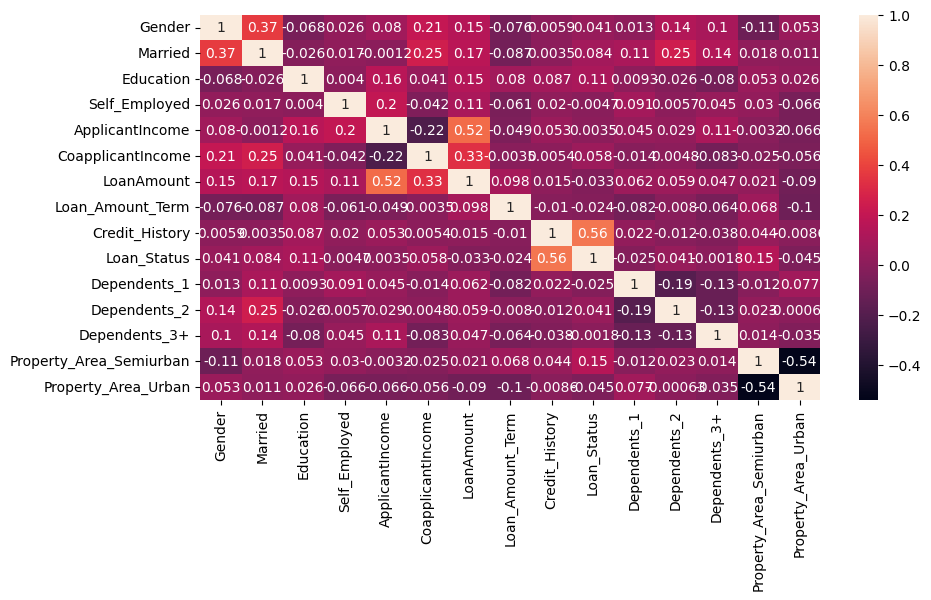

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(), annot=True)

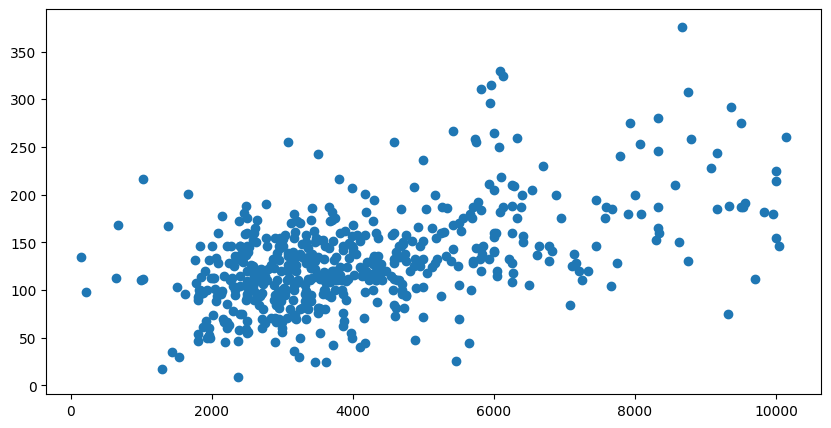

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(x='ApplicantIncome', y='LoanAmount', data=df_train)
plt.show()

<Axes: >

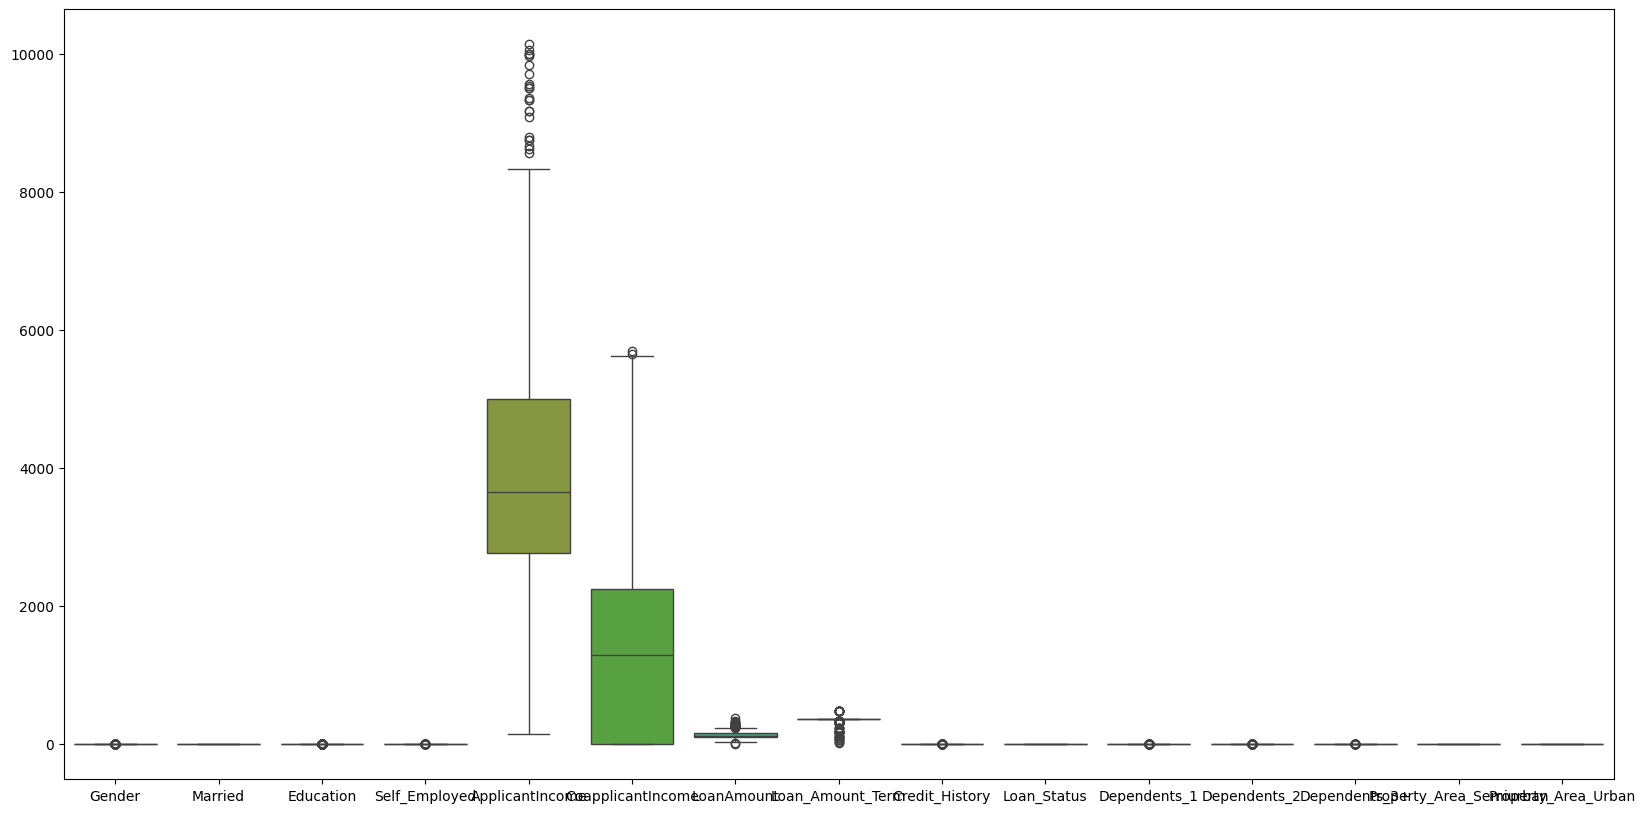

In [59]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train)

<Axes: >

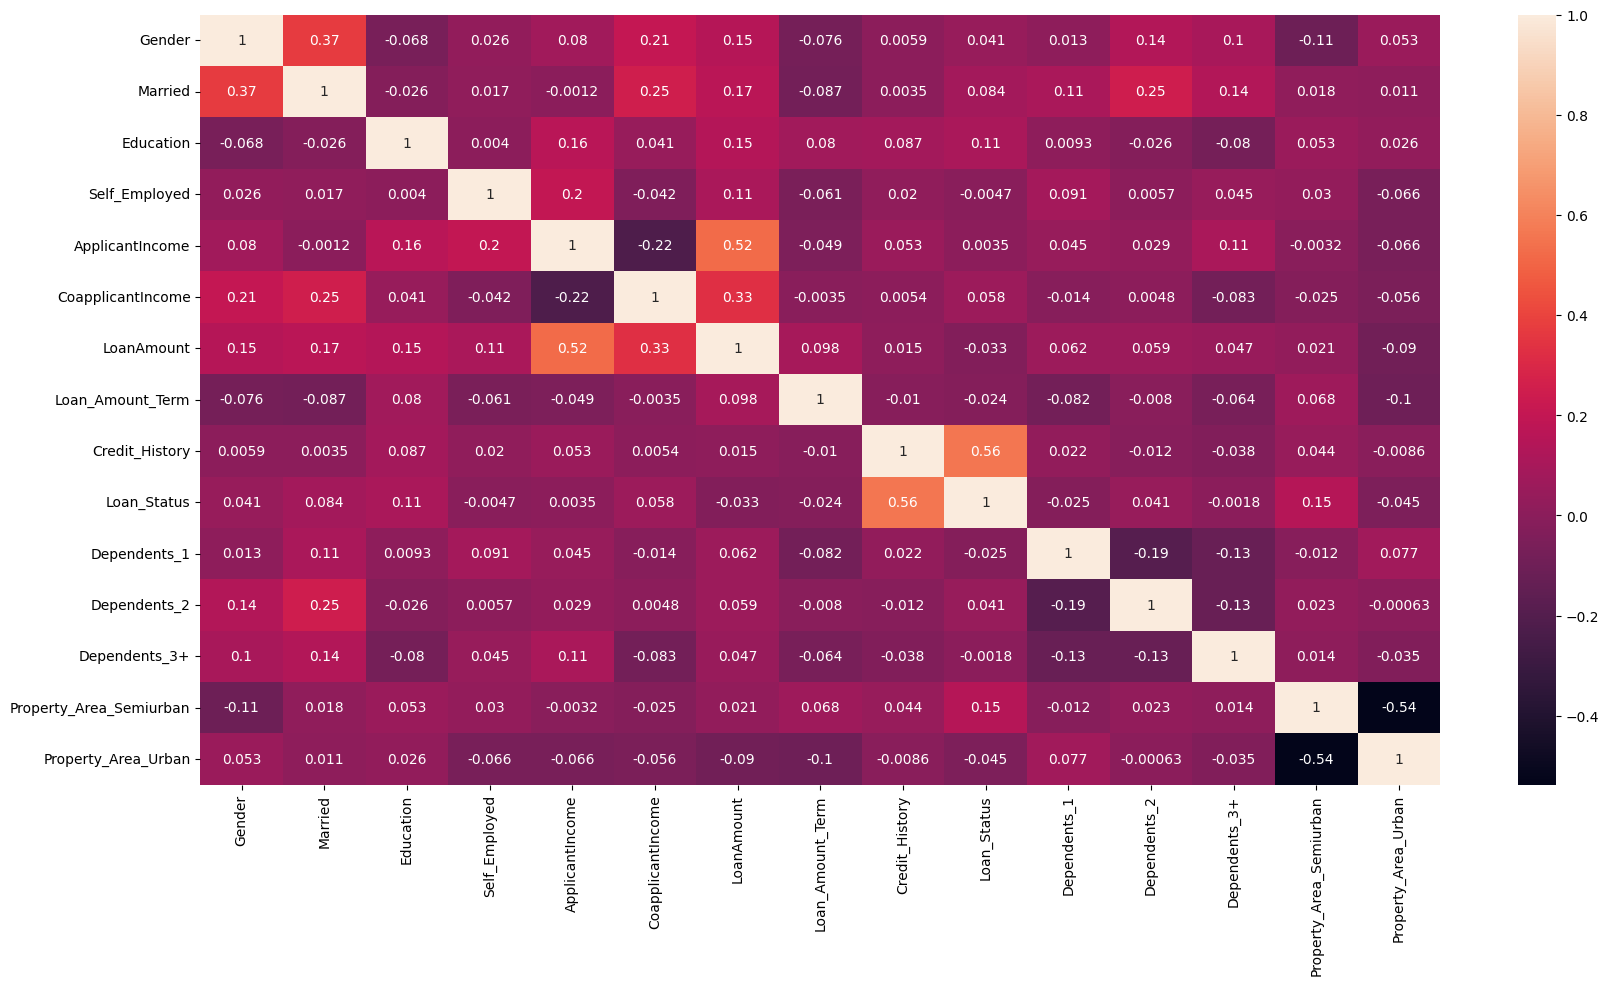

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), annot=True)

In [61]:
cat_col_test = ['Property_Area', 'Dependents']
cat_col_test

['Property_Area', 'Dependents']

In [62]:
df_test = pd.get_dummies(df_test, columns= cat_col_test, drop_first=True)

# Data Modeling

import important libraries for model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
file_test = df_test.copy()

delete unneed column in test dataset

In [65]:
del df_test['Loan_ID']

# Feature Scaling

In [66]:
stander_scaler = StandardScaler()

df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = stander_scaler.fit_transform(df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [67]:
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

df_train['Loan_yo_Income'] = df_train['LoanAmount'] / df_train['Total_Income']
df_test['Loan_yo_Income'] = df_test['LoanAmount'] / df_test['Total_Income']

df_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Loan_yo_Income
0,1,0,1,0,0.902588,-0.933096,0.295309,360.0,1.0,1,False,False,False,False,True,-0.030508,-9.679709
1,1,1,1,0,0.238250,0.101980,-0.061506,360.0,1.0,0,True,False,False,False,False,0.340230,-0.180778
2,1,1,1,1,-0.592435,-0.933096,-1.263023,360.0,1.0,1,False,False,False,False,True,-1.525531,0.827923
3,1,1,0,0,-0.811258,0.685412,-0.216540,360.0,1.0,1,False,False,False,False,True,-0.125846,1.720681
4,1,0,1,0,0.981826,-0.933096,0.190425,360.0,1.0,1,False,False,False,False,True,0.048730,3.907770


In [68]:
del df_train['Loan_Amount_Term']
del df_test['Loan_Amount_Term']

# Modeling

In [69]:
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#scaler = StandardScaler()

test = df_test[X.columns].values

X_train = stander_scaler.fit_transform(X_train)
X_test = stander_scaler.transform(X_test)

test = stander_scaler.transform(test)

In [72]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8272727272727273


confusion matrix: [[17 18]
 [ 1 74]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.49      0.64        35
           1       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



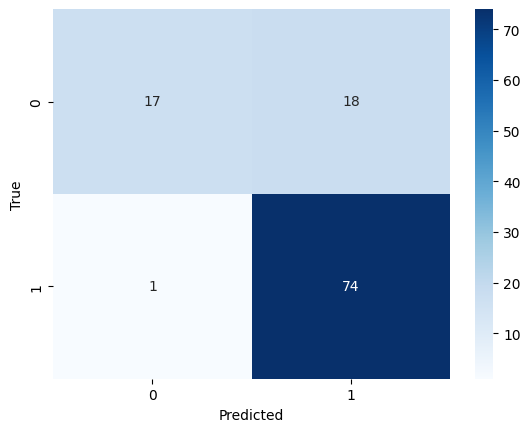

In [73]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:', cm)
print('classification report:', classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [74]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7545454545454545


confusion matrix: [[21 14]
 [13 62]]
classification report:               precision    recall  f1-score   support

           0       0.62      0.60      0.61        35
           1       0.82      0.83      0.82        75

    accuracy                           0.75       110
   macro avg       0.72      0.71      0.71       110
weighted avg       0.75      0.75      0.75       110



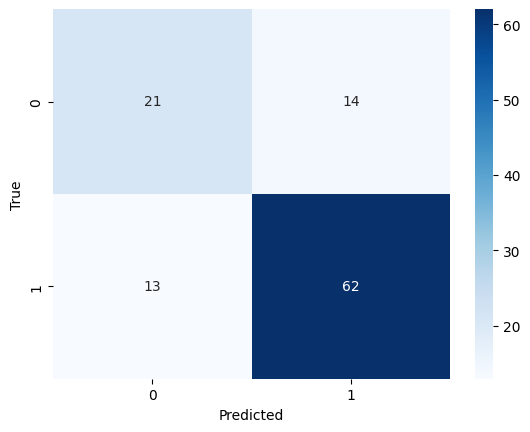

In [75]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:', cm)
print('classification report:', classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [76]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7909090909090909


confusion matrix: [[17 18]
 [ 5 70]]
classification report:               precision    recall  f1-score   support

           0       0.77      0.49      0.60        35
           1       0.80      0.93      0.86        75

    accuracy                           0.79       110
   macro avg       0.78      0.71      0.73       110
weighted avg       0.79      0.79      0.78       110



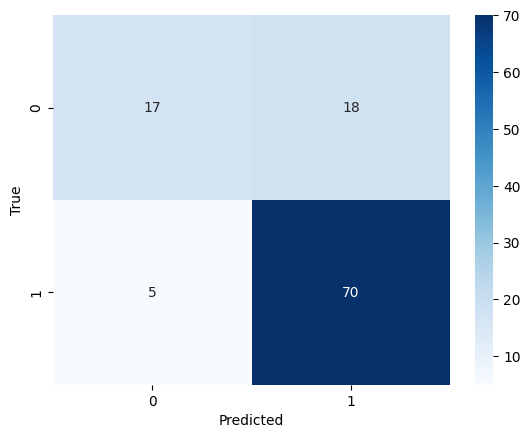

In [77]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix:', cm)
print('classification report:', classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Predection Part

In [78]:
Loan_state = logreg.predict(test)

In [79]:
file_test['Loan_state'] = Loan_state

In [80]:
file_test[['Loan_ID','Loan_state']]

,Loan_ID,Loan_state
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [81]:
file_test[['Loan_ID','Loan_state']].to_csv('submissionlr.csv',index=False)

In [82]:
Loan_state = DT.predict(test)

In [83]:
file_test['Loan_state'] = Loan_state

In [84]:
file_test[['Loan_ID','Loan_state']]

,Loan_ID,Loan_state
0,LP001015,0
1,LP001022,0
2,LP001031,0
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,0
363,LP002975,0
364,LP002980,1
365,LP002986,0


In [85]:
file_test[['Loan_ID','Loan_state']].to_csv('submissiondt.csv',index=False)

In [86]:
Loan_state = RF.predict(test)

In [87]:
file_test['Loan_state'] = Loan_state

In [88]:
file_test[['Loan_ID','Loan_state']]

,Loan_ID,Loan_state
0,LP001015,0
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [89]:
file_test[['Loan_ID','Loan_state']].to_csv('submissionrf.csv',index=False)